<a href="https://colab.research.google.com/github/Alejandro-tech1312/Challenge-Python/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head(2360)
tienda2.head(2360)
tienda3.head(2360)
tienda4.head(2360)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
1,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782
2,Balón de baloncesto,Deportes y diversión,23700.0,0.0,25/12/2022,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
3,Modelado predictivo,Libros,57700.0,1300.0,23/11/2021,Lucas Olivera,Medellín,3,Nequi,1,6.25184,-75.56359
4,Auriculares,Electrónicos,138900.0,5600.0,25/04/2022,Blanca Ramirez,Bogotá,4,Tarjeta de crédito,7,4.60971,-74.08175
...,...,...,...,...,...,...,...,...,...,...,...,...
2353,Mesa de comedor,Muebles,227700.0,12600.0,12/02/2020,Camila Rivera,Medellín,5,Tarjeta de crédito,1,6.25184,-75.56359
2354,Silla de oficina,Muebles,342000.0,18600.0,17/05/2022,Felipe Santos,Bucaramanga,5,Tarjeta de crédito,3,7.12539,-73.11980
2355,Vaso térmico,Deportes y diversión,36700.0,2400.0,03/05/2022,Camila Rivera,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175
2356,Set de ollas,Artículos para el hogar,151800.0,8300.0,15/06/2020,Blanca Ramirez,Cali,5,Tarjeta de crédito,1,3.43722,-76.52250


#1. Análisis de facturación

In [76]:
# Creamos una lista de tuplas (nombre_tienda, dataframe)
tiendas = [("Tienda 1", tienda1), ("Tienda 2", tienda2), ("Tienda 3", tienda3), ("Tienda 4", tienda4)]

# Calculamos facturaciones con tuplas
ventas_totales = [(nombre, tienda['Precio'].sum()) for nombre, tienda in tiendas]

# Mostramos las facturaciones totales
print("Facturación total por tienda:")
for nombre, total in ventas_totales:
    print(f"{nombre}: ${total:,.0f}")

# Identificamos la tienda con mayor facturación
tienda_top = max(ventas_totales, key=lambda x: x[1])
print(f"\nLa tienda con mayor facturación es la {tienda_top[0]}, con un total de ${tienda_top[1]:,.0f}.")

Facturación total por tienda:
Tienda 1: $1,150,880,400
Tienda 2: $1,116,343,500
Tienda 3: $1,098,019,600
Tienda 4: $1,038,375,700

La tienda con mayor facturación es la Tienda 1, con un total de $1,150,880,400.


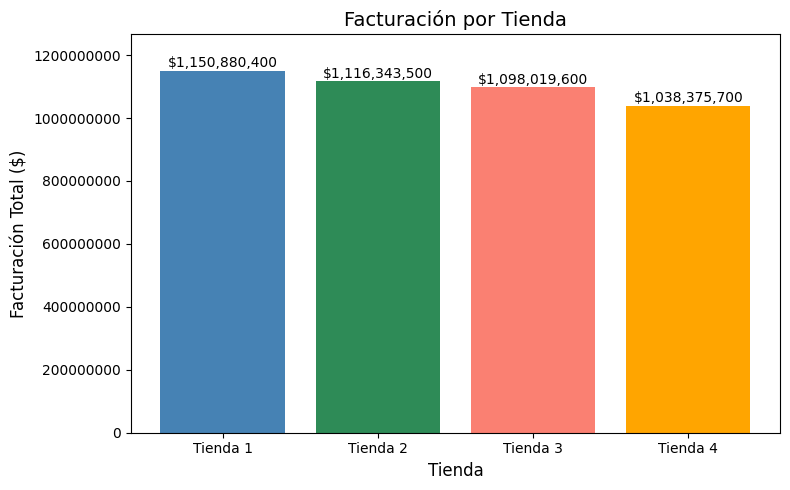

In [77]:
import matplotlib.pyplot as plt

# Separar los nombres y los valores desde la lista de tuplas
nombres_tiendas = [nombre for nombre, _ in ventas_totales]
valores_facturacion = [facturacion for _, facturacion in ventas_totales]

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, valores_facturacion, color=["steelblue", "seagreen", "salmon", "orange"])

# Títulos y etiquetas
plt.title("Facturación por Tienda", fontsize=14)
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Facturación Total ($)", fontsize=12)

# Evitar notación científica y agregar etiquetas
plt.ticklabel_format(style='plain', axis='y')
for i, valor in enumerate(valores_facturacion):
    plt.text(i, valor + max(valores_facturacion)*0.01, f"${valor:,.0f}", ha='center', fontsize=10)

plt.ylim(0, max(valores_facturacion) * 1.1)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [78]:
# Lista de tuplas con nombre y DataFrame de cada tienda
tiendas = [("Tienda 1", tienda1), ("Tienda 2", tienda2), ("Tienda 3", tienda3), ("Tienda 4", tienda4)]

# Iteramos para calcular y mostrar las ventas por categoría ordenadas
for nombre, df in tiendas:
    ventas_por_categoria = df.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)
    print(f'Ventas por categoría - {nombre}:\n{ventas_por_categoria.to_string()}\n')

Ventas por categoría - Tienda 1:
Categoría del Producto
Electrónicos               429493500.0
Electrodomésticos          363685200.0
Muebles                    187633700.0
Instrumentos musicales      91299000.0
Deportes y diversión        39290000.0
Juguetes                    17995700.0
Artículos para el hogar     12698400.0
Libros                       8784900.0

Ventas por categoría - Tienda 2:
Categoría del Producto
Electrónicos               410831100.0
Electrodomésticos          348567800.0
Muebles                    176426300.0
Instrumentos musicales     104990300.0
Deportes y diversión        34744500.0
Juguetes                    15945400.0
Artículos para el hogar     14746900.0
Libros                      10091200.0

Ventas por categoría - Tienda 3:
Categoría del Producto
Electrónicos               410775800.0
Electrodomésticos          329237900.0
Muebles                    201072100.0
Instrumentos musicales      77380900.0
Deportes y diversión        35593100.0
Juguetes   

In [79]:
# Lista de tuplas con nombre y DataFrame
tiendas = [("Tienda 1", tienda1), ("Tienda 2", tienda2), ("Tienda 3", tienda3), ("Tienda 4", tienda4)]

# Iteramos para calcular y mostrar la categoría más vendida por tienda
for nombre, df in tiendas:
    ventas = df.groupby('Categoría del Producto')['Precio'].sum()
    categoria_max = ventas.idxmax()
    print(f"La categoría más vendida en {nombre} es: {categoria_max}")


La categoría más vendida en Tienda 1 es: Electrónicos
La categoría más vendida en Tienda 2 es: Electrónicos
La categoría más vendida en Tienda 3 es: Electrónicos
La categoría más vendida en Tienda 4 es: Electrónicos


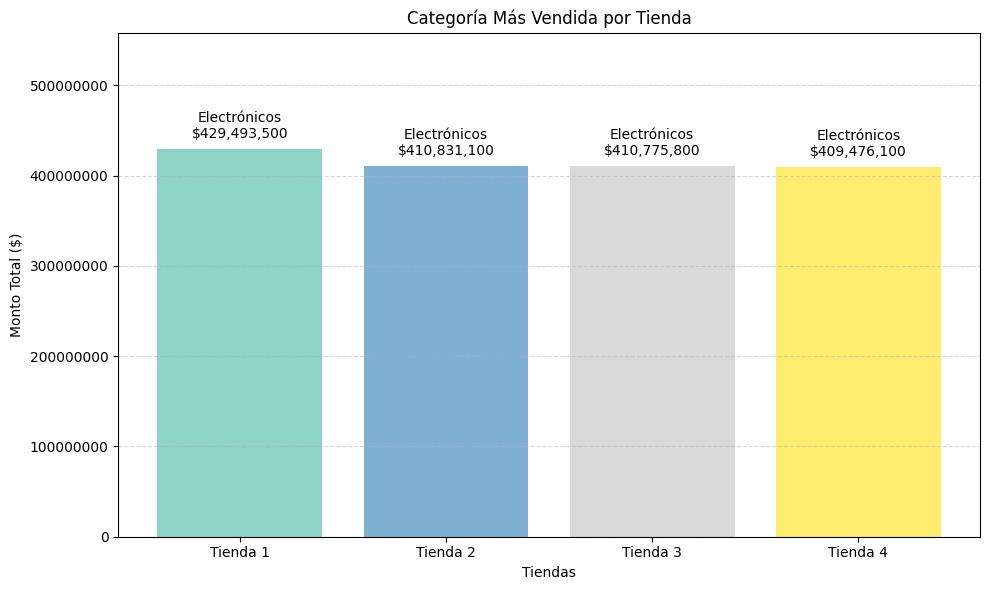

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Lista de tuplas con nombre y DataFrame
tiendas = [("Tienda 1", tienda1), ("Tienda 2", tienda2), ("Tienda 3", tienda3), ("Tienda 4", tienda4)]

# Obtenemos categorías más vendidas y sus montos
categorias_maximas = []
montos_maximos = []
nombres_tiendas = []

for nombre, df in tiendas:
    ventas_por_categoria = df.groupby('Categoría del Producto')['Precio'].sum()
    categoria_top = ventas_por_categoria.idxmax()
    monto_top = ventas_por_categoria.max()
    nombres_tiendas.append(nombre)
    categorias_maximas.append(categoria_top)
    montos_maximos.append(monto_top)

# Colores diferentes por barra
colores = plt.cm.Set3(np.linspace(0, 1, len(nombres_tiendas)))

# Crear gráfico
plt.figure(figsize=(10, 6))
plt.bar(nombres_tiendas, montos_maximos, color=colores)
plt.xlabel("Tiendas")
plt.ylabel("Monto Total ($)")
plt.title("Categoría Más Vendida por Tienda")

# Etiquetas sobre las barras
for i in range(len(nombres_tiendas)):
    plt.text(i, montos_maximos[i] + max(montos_maximos)*0.02,
             f"{categorias_maximas[i]}\n${montos_maximos[i]:,.0f}",
             ha='center', va='bottom')

plt.ylim(0, max(montos_maximos) * 1.3)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [81]:
# Lista de tuplas con nombre y DataFrame
tiendas = [("Tienda 1", tienda1), ("Tienda 2", tienda2), ("Tienda 3", tienda3), ("Tienda 4", tienda4)]

# Calcular promedios y guardarlos en una lista de tuplas
promedios = []
for nombre, df in tiendas:
    promedio = df['Calificación'].mean()
    promedios.append((nombre, promedio))

# Imprimir promedios
print("Promedio de calificación de cada tienda:")
for tienda, promedio in promedios:
    print(f"{tienda}: {promedio:.3f}")

# Tiendas con mejor y peor calificación
tienda_mejor_calificacion = max(promedios, key=lambda x: x[1])[0]
tienda_peor_calificacion = min(promedios, key=lambda x: x[1])[0]

print(f"\nLa {tienda_mejor_calificacion} tiene la calificación más alta")
print(f"\nLa {tienda_peor_calificacion} tiene la calificación más baja")


Promedio de calificación de cada tienda:
Tienda 1: 3.977
Tienda 2: 4.037
Tienda 3: 4.048
Tienda 4: 3.996

La Tienda 3 tiene la calificación más alta

La Tienda 1 tiene la calificación más baja


# 4. Productos más y menos vendidos

In [82]:
# Función auxiliar para obtener los productos más y menos vendidos
def resumen_ventas_por_producto(df, nombre_tienda):
    agrupado = df.groupby("Producto")["Cantidad de cuotas"].sum()
    producto_top = agrupado.idxmax()
    cantidad_top = agrupado.max()
    producto_min = agrupado.idxmin()
    cantidad_min = agrupado.min()

    return producto_top, cantidad_top, producto_min, cantidad_min

# Aplicamos la función a cada tienda y almacenamos los resultados en un diccionario
ventas_resumen = {}

for i, tienda_df in enumerate([tienda1, tienda2, tienda3, tienda4], start=1):
    nombre = f"Tienda {i}"
    producto_top, cantidad_top, producto_min, cantidad_min = resumen_ventas_por_producto(tienda_df, nombre)
    ventas_resumen[nombre] = {
        'mas_vendido': (producto_top, cantidad_top),
        'menos_vendido': (producto_min, cantidad_min)
    }

# Mostrar los resultados
for nombre, resumen in ventas_resumen.items():
    print(f"\n{nombre}")
    print(f"  ➤ Más vendido: {resumen['mas_vendido'][0]} (Cuotas: {resumen['mas_vendido'][1]})")
    print(f"  ➤ Menos vendido: {resumen['menos_vendido'][0]} (Cuotas: {resumen['menos_vendido'][1]})")



Tienda 1
  ➤ Más vendido: Secadora de ropa (Cuotas: 214)
  ➤ Menos vendido: Celular ABXY (Cuotas: 78)

Tienda 2
  ➤ Más vendido: Iniciando en programación (Cuotas: 223)
  ➤ Menos vendido: Mesa de comedor (Cuotas: 89)

Tienda 3
  ➤ Más vendido: Bicicleta (Cuotas: 191)
  ➤ Menos vendido: TV LED UHD 4K (Cuotas: 94)

Tienda 4
  ➤ Más vendido: Dashboards con Power BI (Cuotas: 196)
  ➤ Menos vendido: Armario (Cuotas: 88)


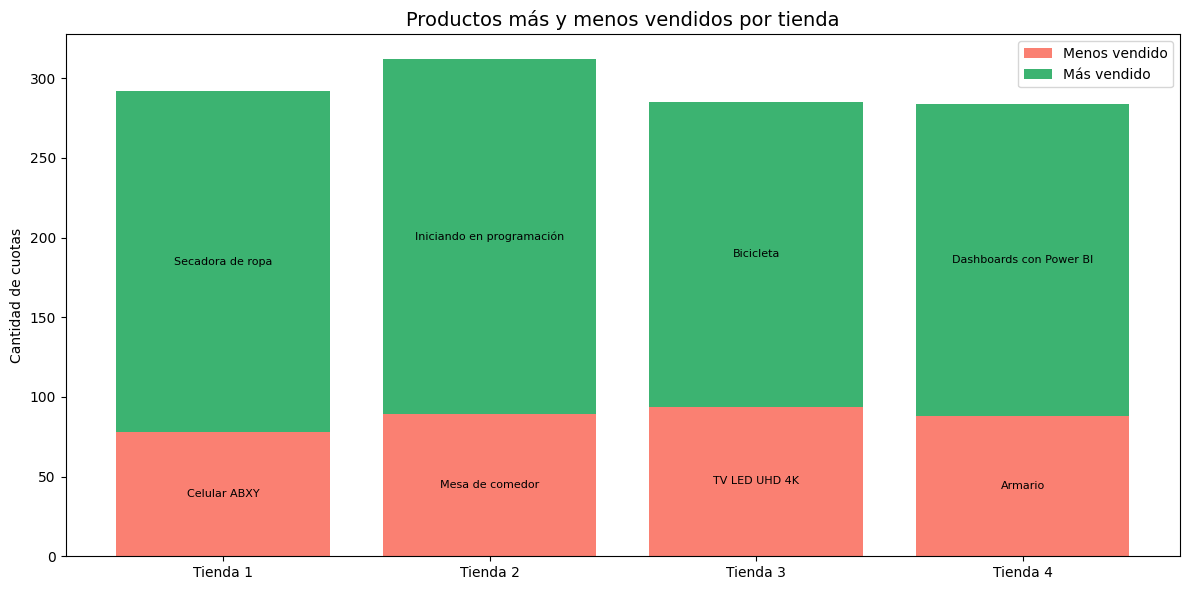

In [83]:
import matplotlib.pyplot as plt

# Extraer los datos del diccionario ventas_resumen
tiendas = list(ventas_resumen.keys())
productos_mas = [ventas_resumen[t]['mas_vendido'][0] for t in tiendas]
cuotas_mas = [ventas_resumen[t]['mas_vendido'][1] for t in tiendas]
productos_menos = [ventas_resumen[t]['menos_vendido'][0] for t in tiendas]
cuotas_menos = [ventas_resumen[t]['menos_vendido'][1] for t in tiendas]

# Crear gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 6))

# Barras inferiores: productos menos vendidos
ax.bar(tiendas, cuotas_menos, color="salmon", label="Menos vendido")

# Barras superiores: productos más vendidos
ax.bar(tiendas, cuotas_mas, bottom=cuotas_menos, color="mediumseagreen", label="Más vendido")

# Agregar etiquetas dentro de las barras
for i in range(len(tiendas)):
    ax.text(i, cuotas_menos[i] / 2, productos_menos[i], ha='center', va='center', fontsize=8)
    ax.text(i, cuotas_menos[i] + cuotas_mas[i] / 2, productos_mas[i], ha='center', va='center', fontsize=8)

# Ajustes del gráfico
ax.set_title("Productos más y menos vendidos por tienda", fontsize=14)
ax.set_ylabel("Cantidad de cuotas")
ax.legend()
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [84]:
# Lista de nombres y DataFrames de las tiendas
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
dataframes = [tienda1, tienda2, tienda3, tienda4]

# Usamos zip y dict comprehension para crear el diccionario de promedios
envios = {nombre: df['Costo de envío'].mean() for nombre, df in zip(nombres_tiendas, dataframes)}

# Imprimimos el título y encabezados
print("Costo de envío promedio por tienda:")
print("\t".join(envios.keys()))
print("\t".join([f"{costo:.2f}" for costo in envios.values()]))

# Determinamos tienda con envío más alto y más bajo
tienda_mas_alto_envio = max(envios, key=envios.get)
tienda_mas_bajo_envio = min(envios, key=envios.get)

# Mostramos resultados
print(f"\nLa {tienda_mas_alto_envio} tiene el costo de envío más alto: ${envios[tienda_mas_alto_envio]:.2f}")
print(f"La {tienda_mas_bajo_envio} tiene el costo de envío más bajo: ${envios[tienda_mas_bajo_envio]:.2f}")



Costo de envío promedio por tienda:
Tienda 1	Tienda 2	Tienda 3	Tienda 4
26018.61	25216.24	24805.68	23459.46

La Tienda 1 tiene el costo de envío más alto: $26018.61
La Tienda 4 tiene el costo de envío más bajo: $23459.46


# 6. Análisis Ventas/Costo de Envío por Tienda y su incidencia

In [85]:
# Datos de cada tienda como tuplas: (Tienda, Ventas, Costo de envío)
tiendas = [
    ("Tienda 1", 1150880400.0, 26018.61),
    ("Tienda 2", 1116343500.0, 25216.24),
    ("Tienda 3", 1098019600.0, 24805.68),
    ("Tienda 4", 1038375700.0, 23459.46)
]

# Umbral de incidencia
umbral = 0.50

# Cálculo de incidencias como diccionario con comprensión
incidencias = {
    tienda: round((costo_envio / ventas) * 100, 6)
    for tienda, ventas, costo_envio in tiendas
}

# Mostrar resultados con clasificación usando if-else y lambda
print("Incidencia del costo de envío como porcentaje en las ventas:")
for tienda, incidencia in incidencias.items():
    clasificacion = "ALTA" if incidencia >= umbral else "BAJA/NULA"
    print(f"{tienda}: {incidencia}% - Incidencia {clasificacion}")


Incidencia del costo de envío como porcentaje en las ventas:
Tienda 1: 0.002261% - Incidencia BAJA/NULA
Tienda 2: 0.002259% - Incidencia BAJA/NULA
Tienda 3: 0.002259% - Incidencia BAJA/NULA
Tienda 4: 0.002259% - Incidencia BAJA/NULA


# 7. Cantidad de Empleados y Nombres por Tienda

In [89]:
# Función para extraer apellido y nombre
def obtener_apellido_y_nombre(nombre_completo):
    partes = nombre_completo.split()
    return partes[-1], ' '.join(partes[:-1])

# Lista de DataFrames con sus nombres
tiendas = [
    ("Tienda 1", tienda1),
    ("Tienda 2", tienda2),
    ("Tienda 3", tienda3),
    ("Tienda 4", tienda4)
]

# Obtenemos empleados únicos, ordenados por apellido
empleados_por_tienda = [
    (nombre, sorted(df['Vendedor'].unique(), key=obtener_apellido_y_nombre))
    for nombre, df in tiendas
]

# Mostramos empleados por tienda
for nombre, empleados in empleados_por_tienda:
    print(f'\n{nombre} tiene {len(empleados)} empleados:')
    for empleado in empleados:
        apellido, nombre_empleado = obtener_apellido_y_nombre(empleado)
        print(f'  - {apellido}, {nombre_empleado}')

# Verificamos si todas las tiendas comparten el mismo conjunto de empleados
conjuntos_empleados = [set(empleados) for _, empleados in empleados_por_tienda]
comparten_empleados = all(conjunto == conjuntos_empleados[0] for conjunto in conjuntos_empleados[1:])

# Mostramos resultado de la comparación
print("\nLas Tiendas comparten sus empleados." if comparten_empleados else "\nCada Tienda tiene sus propios empleados.")


Tienda 1 tiene 14 empleados:
  - Acosta, Rafael
  - Alfonso, Maria
  - Costa, Juliana
  - Fernandez, Juan
  - Gomez, Pedro
  - Herrera, Mariana
  - León, Izabela de
  - Morales, Beatriz
  - Olivera, Lucas
  - Ramirez, Blanca
  - Rivera, Camila
  - Rodriguez, Ángel
  - Santos, Felipe
  - Silva, Santiago

Tienda 2 tiene 14 empleados:
  - Acosta, Rafael
  - Alfonso, Maria
  - Costa, Juliana
  - Fernandez, Juan
  - Gomez, Pedro
  - Herrera, Mariana
  - León, Izabela de
  - Morales, Beatriz
  - Olivera, Lucas
  - Ramirez, Blanca
  - Rivera, Camila
  - Rodriguez, Ángel
  - Santos, Felipe
  - Silva, Santiago

Tienda 3 tiene 14 empleados:
  - Acosta, Rafael
  - Alfonso, Maria
  - Costa, Juliana
  - Fernandez, Juan
  - Gomez, Pedro
  - Herrera, Mariana
  - León, Izabela de
  - Morales, Beatriz
  - Olivera, Lucas
  - Ramirez, Blanca
  - Rivera, Camila
  - Rodriguez, Ángel
  - Santos, Felipe
  - Silva, Santiago

Tienda 4 tiene 14 empleados:
  - Acosta, Rafael
  - Alfonso, Maria
  - Costa, Julian

# 8. Conclusión

Según el análisis anteriormente realizado, la Tienda 4 es la que presenta los menores ingresos totales, si bien su calificación promedio de los clientes es buena siendo un 3.99, es inferior a las tiendas 2 (4.03) y 3 (4.04). Pese a que la tienda 4 tiene un costo promedio de envio más bajo podria ser una ventaja para atraer compradores pero su bajo volumen de ingresos demuestra lo contrario.
Luego se realizó el cálculo de la incidencia del costo de envío en las ventas lo que arrojo una paridad entre las tiendas no teniendo incidencia alguna para nuestro análisis.
Por último se confeccionó un listado de la cantidad de empleados que tiene cada Tienda arrojando el mismo resultado (14) siendo los mismos empleados para todas las tiendas.
Esto traducido quiere decir que los empleados son en total 14 para las 4 tiendas por lo que hay una rotación de empleados. Es por eso que no tiene incidencia alguna.
Distinto hubiera sido que algunas tiendas hubiera tenido más empleados que otra, lo cual incidiría en el margén de ganancia de algunas de las tiendas.
Por lo tanto se aconseja al Sr. Juan considerar vender la tienda 4.